<img src="img/copyright_infringement.png" width="500">
See [https://www.tensorflow.org/](https://www.tensorflow.org/)

### Project Overview
* **[TensorFlow](https://www.tensorflow.org/)**<sup>TM</sup> is a software library for numerical computation on computation graphs.
* It was open-sourced in 2015 and is currently very popular for Deep Learning.
* Backed by 
**<span style="color:blue">G</span><span style="color:red">o</span><span style="color:yellow">o</span><span style="color:blue">g</span><span style="color:green">l</span><span style="color:red">e</span>**.

<div class="myimages">
    <div style="float:left;margin-right:5px;">
        <img class="middle-img" src="img/so_hot_right_now.jpg"/ width="300"/>
    </div>
    <div style="float:left;margin-right:5px;">
        <img src="img/fchollet_popularity_2017.jpg" width="400">
    </div>
</div>

<p>[https://imgflip.com/memegenerator/](https://imgflip.com/memegenerator/48288540/So-hot-right-now)</p>

Another view: [http://nicodjimenez.github.io/2017/10/08/tensorflow.html](http://nicodjimenez.github.io/2017/10/08/tensorflow.html).

### Motivating Problem
#### Given:
$
\mathcal{L}(w) = w^2 - 10 w + 25 
$
#### Find:
$
\underset{w}{\mathrm{argmin}} \, \mathcal{L}(w)
$
#### Hint:
Answer = 5

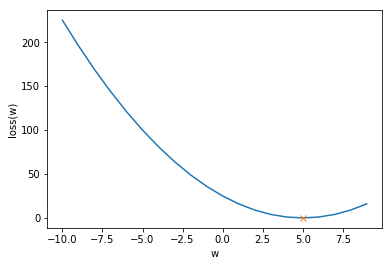

In [14]:
# Actually, let's graph this function.
import matplotlib.pyplot as plt
%matplotlib inline
def loss(w):
    return [w**2 - 10*w + 25 for w in w]
w = list(range(-10,10))
plt.plot(w,loss(w)); plt.plot([5],loss([5]),'x')
plt.xlabel('w'); plt.ylabel('loss(w)')
plt.show(); del w, loss

### Computational Graphs
Artificial neural networks are graphs. So is our loss function $\mathcal{L}(w)$.
<img src="img/cg/cg1.png" width="400">

In [15]:
import tensorflow as tf

In [16]:
# Set up variables
w = tf.Variable(0,dtype=tf.float32)
loss = w**2 - 10 * w + 25
# Equivalently:
#loss = tf.add(tf.add(w**2,tf.multiply(-10.,w)),25)
train = tf.train.RMSPropOptimizer(0.01).minimize(loss)

In [17]:
# Itiomatic: run session, initialise variables
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [18]:
# Check initial value of w
print(session.run(w))

0.0


In [19]:
# Take one gradient step (check updated w)
session.run(train)
print(session.run(w))

0.0302891


In [20]:
# Take 1000 gradient steps (relish result)
for _ in range(1000): session.run(train)
print(session.run(w))

5.0


In [21]:
# Close the door behind you
session.close()

### Key Concepts (Interm Summary)
* Computation Graph
* Variables
* Sessions
* Modularity (try replacing trainer, e.g. s/GradientDescentOptimizer/RMSPropOptimizer/)

In [26]:
# Passing numpy arrays into the graph as data
import numpy as np
data = np.array([[1.],[-10.],[25.]])
w = tf.Variable(0,dtype=tf.float32)
x = tf.placeholder(tf.float32, [3,1])
loss = x[0][0]*w**2 + x[1][0]*w + x[2][0]
train = tf.train.RMSPropOptimizer(0.01).minimize(loss)

In [27]:
# Initialise variables + run session + train
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for _ in range(1000): session.run(train, feed_dict={x:data})
    print(session.run(w))

5.0


### Bonus: Interactive Sessions
If you are using jupyter notebook, you can use an interactive session.

In [28]:
sess = tf.InteractiveSession()
a = tf.constant(1)
b = tf.constant(2)
c = a + b
# instead of sess.run(c)
c.eval()

3

In [29]:
a.eval()

1

In [30]:
# Close the sess when you are done.
sess.close()

<img src="img/what_leo_needs.png" width="500">
### Models in the wild
* CNNs.
* RNNs.
* VAEs.
* GANs.

(*And many other fine acronyms!*)

Demo1 [here](demos/convolutional_network_demo.ipynb).


### TensorBoard

* TensorBoard can be used to visualise the network graph, training accuracy, loss, inputs, and model internal representations--including feature embeddings. 
* These visualisations can be used for decoding and understanding the model.

Demo2 [here](demos/tensorboard_demo.ipynb).

### Discussion: Big Data, Big Models, Big Computing...

<div class="myimages">
    <div style="float:left;margin-right:5px;">
        <img class="middle-img" src="img/how_big_is_your_data.png"/ width="400"/>
    </div>
    <div style="float:left;margin-right:5px;">
        <img src="img/model_zoo.png" width="300">
    </div>
</div>

<img class="middle-img" src="img/multiple_devices.png"/ width="400"/>

Demo multi GPU computing (*internet/time permitting*)

**Warning**: the following won't run unless you are running on a system with at least 2 GPUs (+1 CPU).

In [ ]:
# Multi GPU computing
# import numpy as np
# import tensorflow as tf
import datetime

# Example: compute A^n + B^n on 2 GPUs

#Processing Units logs
log_device_placement = True

#num of multiplications to perform
n = 10

# Create random large matrix
A = np.random.rand(10000, 10000).astype('float32')
B = np.random.rand(10000, 10000).astype('float32')

# Create a graph to store results
g = []

# Define matrix power
def matpow(M, n):
    if n < 1: #Abstract cases where n < 1
        return M
    else:
        return tf.matmul(M, matpow(M, n-1))

# GPU:0 computes A^n
with tf.device('/gpu:0'):
    #compute A^n and store result in g
    a = tf.constant(A)
    g.append(matpow(a, n))

#GPU:1 computes B^n
with tf.device('/gpu:1'):
    #compute B^n and store result in g
    b = tf.constant(B)
    g.append(matpow(b, n))

with tf.device('/cpu:0'):
    s = tf.add_n(g) #Add all elements in g, i.e. A^n + B^n

t1 = datetime.datetime.now()
with tf.Session(config=tf.ConfigProto(log_device_placement=log_device_placement)) as sess:
    # Runs the op.
    sess.run(s)

t2 = datetime.datetime.now()
print(t1, t2)